# Movie Rating Prediction and Classification(Supervised)

In this notebook, we explore the task of predicting movie ratings and classifying movies into different rating classes based on their features. We will employ various regression and classification models to achieve this, using techniques such as grid search for hyperparameter tuning and cross-validation for model evaluation.

## Dataset Description

The dataset contains information about movies, including features like budget, popularity, runtime, vote average, and vote count. The target variables are `weighted_rating` for regression and `rating_class` for classification, which are calculated variables.

## Data Loading and Exploration

Let's start by loading the dataset and performing some initial exploration to understand its structure and contents.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [5]:
df1 = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv")
df2 = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")

In [6]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
#Merging the dataframes after renaming the columns
df1.columns = ["id", "tittle", "cast", "crew"]
df = df2.merge(df1, on="id")

In [9]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
#selecting our features
columns = ["id", "budget", "genres",	"popularity", "runtime", "vote_average", "vote_count", "original_title"]
df = df[columns]

In [11]:
df.head()

,id,budget,genres,popularity,runtime,vote_average,vote_count,original_title
0,19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,162.0,7.2,11800,Avatar
1,285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,169.0,6.9,4500,Pirates of the Caribbean: At World's End
2,206647,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,148.0,6.3,4466,Spectre
3,49026,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,165.0,7.6,9106,The Dark Knight Rises
4,49529,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,132.0,6.1,2124,John Carter


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4803 non-null   int64  
 1   budget          4803 non-null   int64  
 2   genres          4803 non-null   object 
 3   popularity      4803 non-null   float64
 4   runtime         4801 non-null   float64
 5   vote_average    4803 non-null   float64
 6   vote_count      4803 non-null   int64  
 7   original_title  4803 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 300.3+ KB


In [13]:
df.describe()

,id,budget,popularity,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,338.000000,10.000000,13752.000000


In [14]:
df[df.isnull().any(axis=1)]

,id,budget,genres,popularity,runtime,vote_average,vote_count,original_title
2656,370980,15000000,"[{""id"": 18, ""name"": ""Drama""}]",0.738646,NaN,7.3,12,Chiamatemi Francesco - Il Papa della gente
4140,459488,2,"[{""id"": 99, ""name"": ""Documentary""}]",0.050625,NaN,0.0,0,"To Be Frank, Sinatra at 100"


In [15]:
df.dropna(inplace=True)

### Defining the weighted ratings using the IMDB formula.

In [16]:
def weighted_rating():
  m = df['vote_count'].quantile(0.8)
  v = df["vote_count"]
  R = df["vote_average"]
  C = df["vote_average"].mean()
  return (v/(v+m) * R) + (m/(m+v) * C)

In [17]:
df["weighted_rating"] = weighted_rating()
df.sort_values("weighted_rating", ascending=False).head(20)

,id,budget,genres,popularity,runtime,vote_average,vote_count,original_title,weighted_rating
1881,278,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",136.747729,142.0,8.5,8205,The Shawshank Redemption,8.248366
662,550,63000000,"[{""id"": 18, ""name"": ""Drama""}]",146.757391,139.0,8.3,9413,Fight Club,8.096150
3337,238,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",143.659698,175.0,8.4,5893,The Godfather,8.077430
3232,680,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",121.463076,154.0,8.3,8428,Pulp Fiction,8.074758
65,155,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",187.322927,152.0,8.2,12002,The Dark Knight,8.044265
809,13,55000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",138.133331,142.0,8.2,7927,Forrest Gump,7.972839
96,27205,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",167.583710,148.0,8.1,13752,Inception,7.969305
95,157336,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",724.247784,169.0,8.1,10867,Interstellar,7.937419
1990,1891,18000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",78.517830,124.0,8.2,5879,The Empire Strikes Back,7.904794
1818,424,22000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",104.469351,195.0,8.3,4329,Schindler's List,7.900128


### Processing the genres column

In [18]:
def process_genre(genre_data):
  genre_list = ast.literal_eval(genre_data)
  return [d["name"] for d in genre_list]

df["genres"] = df["genres"].apply(process_genre)
df.head()

,id,budget,genres,popularity,runtime,vote_average,vote_count,original_title,weighted_rating
0,19995,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,162.0,7.2,11800,Avatar,7.116889
1,285,300000000,"[Adventure, Fantasy, Action]",139.082615,169.0,6.9,4500,Pirates of the Caribbean: At World's End,6.758387
2,206647,245000000,"[Action, Adventure, Crime]",107.376788,148.0,6.3,4466,Spectre,6.263473
3,49026,250000000,"[Action, Crime, Drama, Thriller]",112.312950,165.0,7.6,9106,The Dark Knight Rises,7.456565
4,49529,260000000,"[Action, Adventure, Science Fiction]",43.926995,132.0,6.1,2124,John Carter,6.097883


In [19]:
df = df.explode("genres")
df.dropna(inplace=True)
df.head()

,id,budget,genres,popularity,runtime,vote_average,vote_count,original_title,weighted_rating
0,19995,237000000,Action,150.437577,162.0,7.2,11800,Avatar,7.116889
0,19995,237000000,Adventure,150.437577,162.0,7.2,11800,Avatar,7.116889
0,19995,237000000,Fantasy,150.437577,162.0,7.2,11800,Avatar,7.116889
0,19995,237000000,Science Fiction,150.437577,162.0,7.2,11800,Avatar,7.116889
1,285,300000000,Adventure,139.082615,169.0,6.9,4500,Pirates of the Caribbean: At World's End,6.758387


### Creating a rating class based on the weighted rates

In [20]:
df["rating_class"] = df["weighted_rating"].apply(lambda x: "High" if x > 8 else ("Average" if x < 8 and x > 6 else "Low"))

In [21]:
df.groupby("rating_class").head(5).sort_values("weighted_rating")

,id,budget,genres,popularity,runtime,vote_average,vote_count,original_title,weighted_rating,rating_class
9,209112,250000000,Action,155.790452,151.0,5.7,7004,Batman v Superman: Dawn of Justice,5.747309,Low
9,209112,250000000,Adventure,155.790452,151.0,5.7,7004,Batman v Superman: Dawn of Justice,5.747309,Low
5,559,258000000,Fantasy,115.699814,139.0,5.9,3576,Spider-Man 3,5.940819,Low
5,559,258000000,Action,115.699814,139.0,5.9,3576,Spider-Man 3,5.940819,Low
5,559,258000000,Adventure,115.699814,139.0,5.9,3576,Spider-Man 3,5.940819,Low
1,285,300000000,Adventure,139.082615,169.0,6.9,4500,Pirates of the Caribbean: At World's End,6.758387,Average
0,19995,237000000,Action,150.437577,162.0,7.2,11800,Avatar,7.116889,Average
0,19995,237000000,Adventure,150.437577,162.0,7.2,11800,Avatar,7.116889,Average
0,19995,237000000,Fantasy,150.437577,162.0,7.2,11800,Avatar,7.116889,Average
0,19995,237000000,Science Fiction,150.437577,162.0,7.2,11800,Avatar,7.116889,Average


## EDA and Visualisations

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

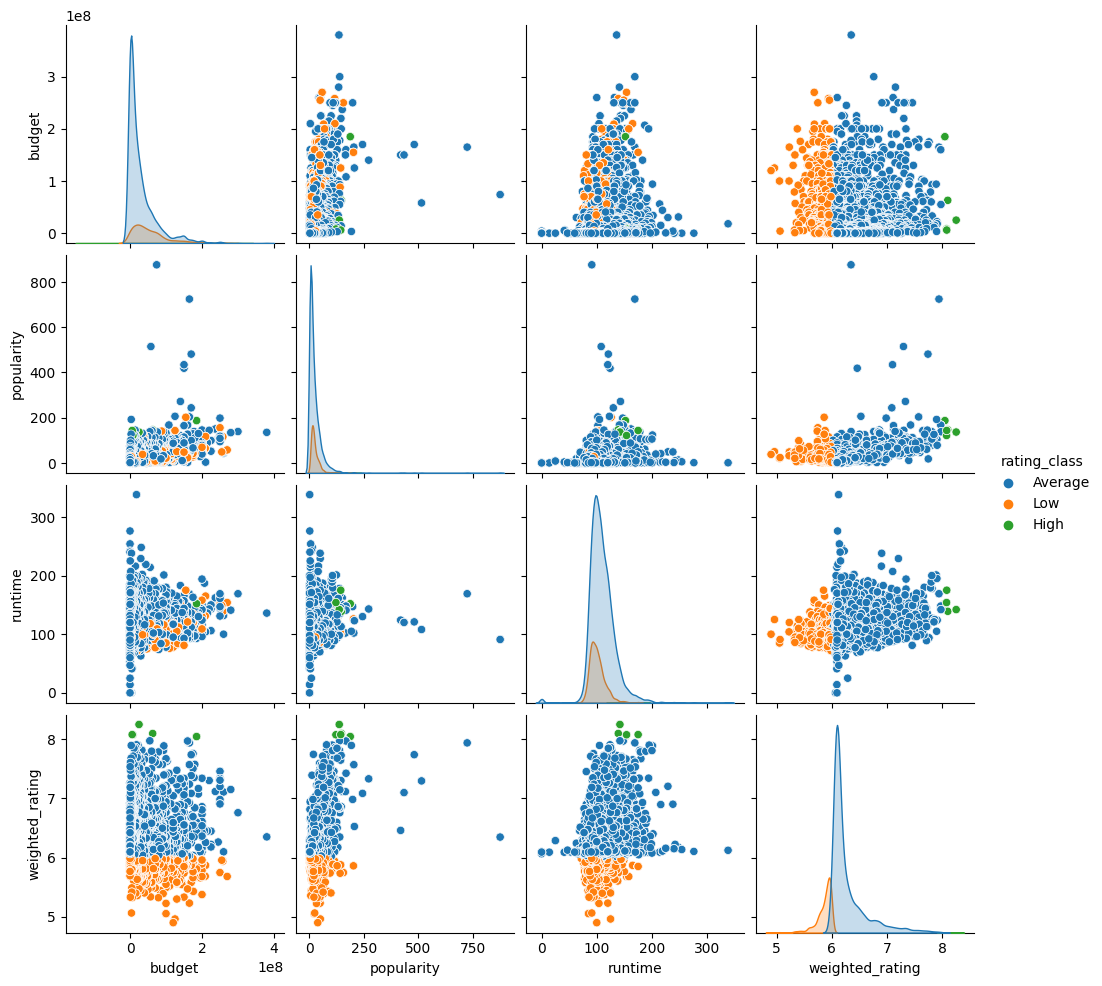

In [22]:
sns.pairplot(df[["budget", "popularity", "runtime", "weighted_rating","rating_class"]], hue="rating_class")
plt.show()

In [23]:
#creating separate features for visualisations
genre_list = []
popularity_list = []
weighted_rating_list = []

for idx, row in df.iterrows():
    for genre in row['genres']:
        genre_list.append(genre)
        popularity_list.append(row['popularity'])
        weighted_rating_list.append(row['weighted_rating'])

genre_df = pd.DataFrame({
    "genres": genre_list,
    "popularity": popularity_list,
    "weighted_rating": weighted_rating_list
})

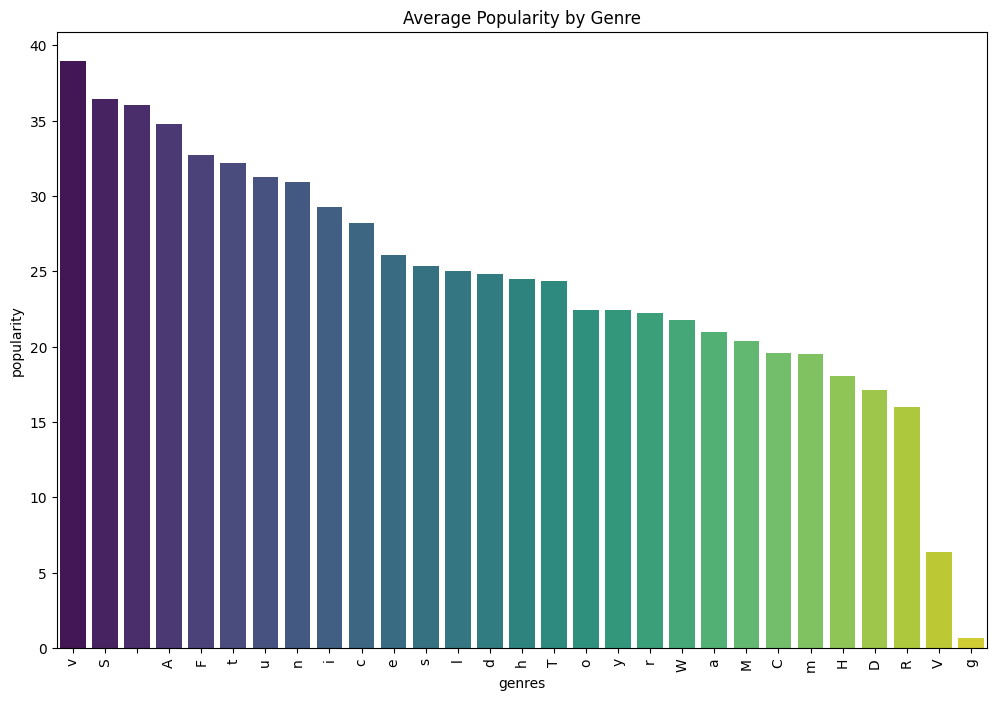

In [24]:
avg_ratings = genre_df.groupby('genres')['popularity'].mean().reset_index()

avg_ratings = avg_ratings.sort_values(by='popularity', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='genres', y='popularity', data=avg_ratings, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Popularity by Genre')
plt.show()

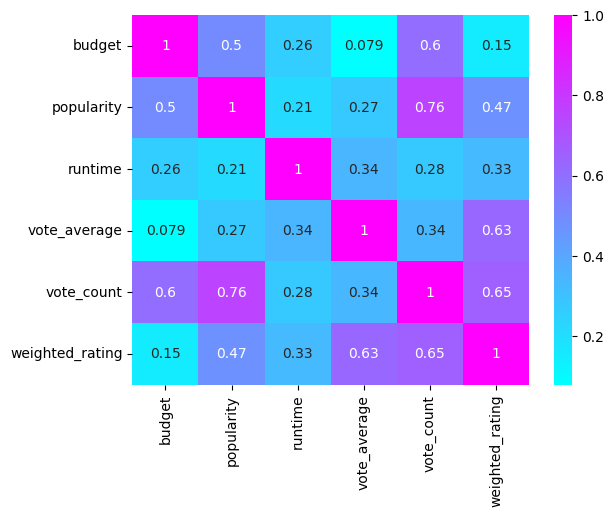

In [25]:
sns.heatmap(df[["budget", "popularity", "runtime", "vote_average", "vote_count", "weighted_rating"]].corr(), annot=True, cmap = "cool")
plt.show()

In [26]:
df

,id,budget,genres,popularity,runtime,vote_average,vote_count,original_title,weighted_rating,rating_class
0,19995,237000000,Action,150.437577,162.0,7.2,11800,Avatar,7.116889,Average
0,19995,237000000,Adventure,150.437577,162.0,7.2,11800,Avatar,7.116889,Average
0,19995,237000000,Fantasy,150.437577,162.0,7.2,11800,Avatar,7.116889,Average
0,19995,237000000,Science Fiction,150.437577,162.0,7.2,11800,Avatar,7.116889,Average
1,285,300000000,Adventure,139.082615,169.0,6.9,4500,Pirates of the Caribbean: At World's End,6.758387,Average
...,...,...,...,...,...,...,...,...,...,...
4800,231617,0,Comedy,1.444476,120.0,7.0,6,"Signed, Sealed, Delivered",6.098833,Average
4800,231617,0,Drama,1.444476,120.0,7.0,6,"Signed, Sealed, Delivered",6.098833,Average
4800,231617,0,Romance,1.444476,120.0,7.0,6,"Signed, Sealed, Delivered",6.098833,Average
4800,231617,0,TV Movie,1.444476,120.0,7.0,6,"Signed, Sealed, Delivered",6.098833,Average


In [27]:
#storing ids and titles for future reference if needed
df_ref = df[["id", "original_title"]]
df_ref.head()

,id,original_title
0,19995,Avatar
0,19995,Avatar
0,19995,Avatar
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End


## Setting up for the Machine Learning Models

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression

### Preparing the datasets and the preprocessors for the pipeline.

In [29]:
X_reg = df.drop(['id', 'original_title', 'weighted_rating'], axis=1)
y_reg = df['weighted_rating']

X_class = df.drop(['id', 'original_title', 'weighted_rating'], axis=1)
y_class = df['rating_class']

categorical_cols_reg = ['genres']
categorical_cols_class = ['genres', 'rating_class']
numerical_cols = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']

numerical_transformer = StandardScaler()
categorical_transformer_reg = OneHotEncoder(drop='first', sparse=False)
categorical_transformer_class = OneHotEncoder(drop='first', sparse=False)

preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer_reg, categorical_cols_reg)
    ]
)

preprocessor_class = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer_class, categorical_cols_class)
    ]
)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [30]:
X_train_reg

,budget,genres,popularity,runtime,vote_average,vote_count,rating_class
2706,14000000,Drama,0.900442,139.0,5.2,10,Average
3889,3000000,Thriller,22.789649,91.0,5.7,722,Low
1954,25000000,History,1.894749,128.0,7.0,31,Average
1399,40000000,Thriller,60.231382,109.0,6.7,3417,Average
1821,0,Comedy,22.644275,93.0,5.4,500,Low
...,...,...,...,...,...,...,...
4702,200,Drama,0.050978,109.0,5.0,1,Average
1795,26000000,Crime,10.981038,127.0,7.1,146,Average
1873,25500000,Crime,12.756344,128.0,6.0,171,Average
262,93000000,Adventure,138.049577,178.0,8.0,8705,Average


In [31]:
y_test_reg

3117    6.052974
1356    7.051308
3032    6.118328
2559    5.907019
3875    6.095177
          ...   
4094    6.085140
4421    6.050395
3881    6.281130
122     6.179449
4204    6.093835
Name: weighted_rating, Length: 2432, dtype: float64

### Defining the Regression Models and their parameters within the pipeline.

In [32]:
regression_models = {
    'LinearRegression': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('model', LinearRegression())
    ]),
    'Ridge': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('model', Ridge())
    ]),
    'Lasso': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('model', Lasso())
    ]),
    'GradientBoosting': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('model', GradientBoostingRegressor())
    ]),
    'DecisionTreeRegressor': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('model', DecisionTreeRegressor())
    ]),
    'RandomForestRegressor': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('model', RandomForestRegressor())
    ]),
    'KNeighborsRegressor': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('model', KNeighborsRegressor())
    ]),
    'SVR': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('model', SVR())
    ]),
    'PolynomialRegression': Pipeline(steps=[
        ('preprocessor', preprocessor_reg),
        ('poly', PolynomialFeatures()),
        ('model', LinearRegression())
    ])
}

regression_param_grids = {
    'LinearRegression': {},
    'PolynomialRegression': {
        'poly__degree': [2, 3]
    },
    'Ridge': {
        'model__alpha': [0.1, 1, 10]
    },
    'Lasso': {
        'model__alpha': [0.1, 1, 10]
    },
    'GradientBoosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    },
    'DecisionTreeRegressor': {
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [5, 10]
    },
    'RandomForestRegressor': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 20],
        'model__min_samples_split': [5, 10]
    },
    'KNeighborsRegressor': {
        'model__n_neighbors': [3, 5],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean']
    },
    'SVR': {
        'model__C': [1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale']
    }
}

#### Model Training and Evaluation
For each model, provide code to train, evaluate, and display results.

Training LinearRegression for Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

LinearRegression Mean Squared Error: 0.0389
Best Parameters for LinearRegression: {}
Training Ridge for Regression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Ridge Mean Squared Error: 0.0389
Best Parameters for Ridge: {'model__alpha': 10}
Training Lasso for Regression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Lasso Mean Squared Error: 0.0616
Best Parameters for Lasso: {'model__alpha': 0.1}
Training GradientBoosting for Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GradientBoosting Mean Squared Error: 0.0001
Best Parameters for GradientBoosting: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Training DecisionTreeRegressor for Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

DecisionTreeRegressor Mean Squared Error: 0.0001
Best Parameters for DecisionTreeRegressor: {'model__max_depth': 20, 'model__min_samples_split': 5}
Training RandomForestRegressor for Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

RandomForestRegressor Mean Squared Error: 0.0001
Best Parameters for RandomForestRegressor: {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Training KNeighborsRegressor for Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

KNeighborsRegressor Mean Squared Error: 0.0087
Best Parameters for KNeighborsRegressor: {'model__metric': 'euclidean', 'model__n_neighbors': 3, 'model__weights': 'distance'}
Training SVR for Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

SVR Mean Squared Error: 0.0027
Best Parameters for SVR: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Training PolynomialRegression for Regression...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

PolynomialRegression Mean Squared Error: 225060754.9347
Best Parameters for PolynomialRegression: {'poly__degree': 3}


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


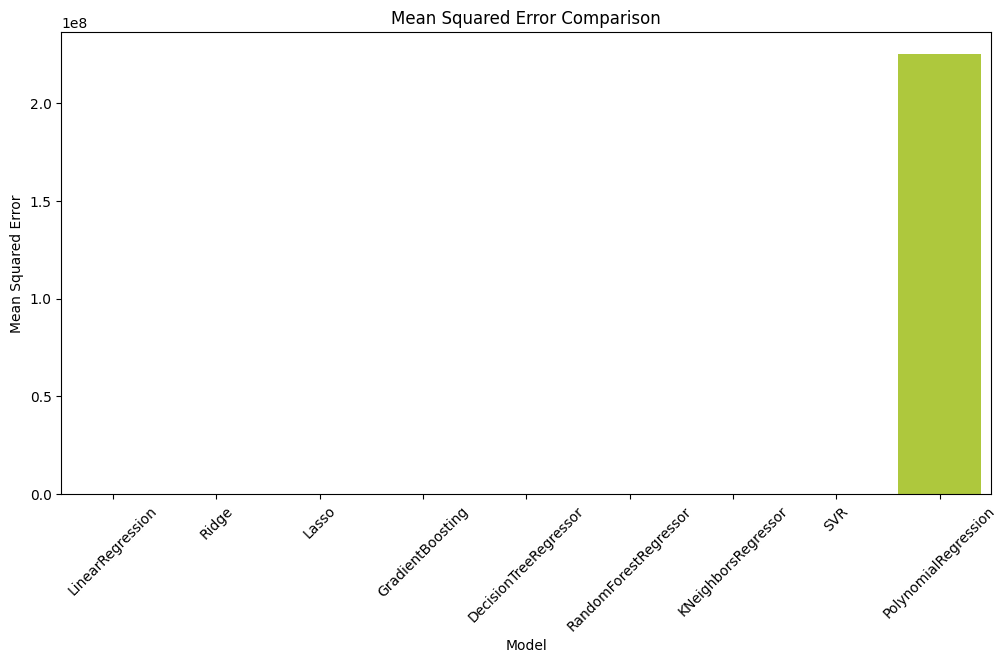

In [33]:
def plot_model_performance(scores, model_names, metric):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=model_names, y=scores, palette='viridis')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.show()

best_mse_scores = {}
best_accuracy_scores = {}
best_params = {}

for model_name, model_pipeline in regression_models.items():
    print(f"Training {model_name} for Regression...")
    grid_search = GridSearchCV(model_pipeline, regression_param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
    grid_search.fit(X_train_reg, y_train_reg)

    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)

    mse_score = mean_squared_error(y_test_reg, y_pred_reg)
    best_mse_scores[model_name] = mse_score
    best_params[model_name] = grid_search.best_params_

    print(f"{model_name} Mean Squared Error: {mse_score:.4f}")
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

plot_model_performance(list(best_mse_scores.values()), list(best_mse_scores.keys()), 'Mean Squared Error')

### Defining the Regression Models and their parameters within the pipeline.

In [34]:
classification_models = {
    'LogisticRegression': Pipeline(steps=[
        ('preprocessor', preprocessor_class),
        ('model', LogisticRegression(max_iter=1000))
    ]),
    'KNeighborsClassifier': Pipeline(steps=[
        ('preprocessor', preprocessor_class),
        ('model', KNeighborsClassifier())
    ]),
    'DecisionTreeClassifier': Pipeline(steps=[
        ('preprocessor', preprocessor_class),
        ('model', DecisionTreeClassifier())
    ]),
    'RandomForestClassifier': Pipeline(steps=[
        ('preprocessor', preprocessor_class),
        ('model', RandomForestClassifier())
    ]),
    'SVM': Pipeline(steps=[
        ('preprocessor', preprocessor_class),
        ('model', SVC())
    ])
}

classification_param_grids = {
    'LogisticRegression': {
        'model__C': [0.1, 1],
        'model__penalty': ['l2']
    },
    'KNeighborsClassifier': {
        'model__n_neighbors': [5, 7],
        'model__weights': ['uniform']
    },
    'DecisionTreeClassifier': {
        'model__max_depth': [None, 10],
        'model__min_samples_split': [5]
    },
    'RandomForestClassifier': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 20]
    },
    'SVM': {
        'model__C': [1],
        'model__kernel': ['rbf']
    }
}

#### Model Training and Evaluation

Training LogisticRegression for Classification...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

LogisticRegression Accuracy: 1.0000
Best Parameters for LogisticRegression: {'model__C': 1, 'model__penalty': 'l2'}
Training KNeighborsClassifier for Classification...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

KNeighborsClassifier Accuracy: 0.9979
Best Parameters for KNeighborsClassifier: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
Training DecisionTreeClassifier for Classification...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

DecisionTreeClassifier Accuracy: 1.0000
Best Parameters for DecisionTreeClassifier: {'model__max_depth': None, 'model__min_samples_split': 5}
Training RandomForestClassifier for Classification...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

RandomForestClassifier Accuracy: 1.0000
Best Parameters for RandomForestClassifier: {'model__max_depth': None, 'model__n_estimators': 100}
Training SVM for Classification...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

SVM Accuracy: 0.9992
Best Parameters for SVM: {'model__C': 1, 'model__kernel': 'rbf'}


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


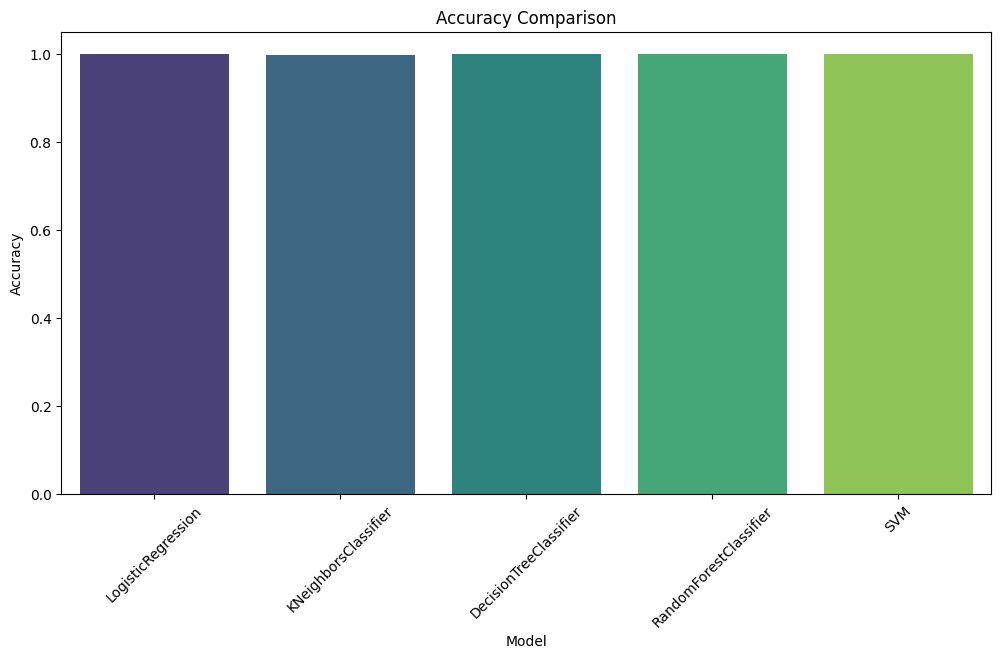

In [35]:
for model_name, model_pipeline in classification_models.items():
    print(f"Training {model_name} for Classification...")
    grid_search = GridSearchCV(model_pipeline, classification_param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1, verbose=3)
    grid_search.fit(X_train_class, y_train_class)

    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)

    accuracy_score_val = accuracy_score(y_test_class, y_pred_class)
    best_accuracy_scores[model_name] = accuracy_score_val
    best_params[model_name] = grid_search.best_params_

    print(f"{model_name} Accuracy: {accuracy_score_val:.4f}")
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

plot_model_performance(list(best_accuracy_scores.values()), list(best_accuracy_scores.keys()), 'Accuracy')

## Results and Visualisations

In [36]:
print("\nBest Parameters for Each Model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


Best Parameters for Each Model:
LinearRegression: {}
Ridge: {'model__alpha': 10}
Lasso: {'model__alpha': 0.1}
GradientBoosting: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
DecisionTreeRegressor: {'model__max_depth': 20, 'model__min_samples_split': 5}
RandomForestRegressor: {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 200}
KNeighborsRegressor: {'model__metric': 'euclidean', 'model__n_neighbors': 3, 'model__weights': 'distance'}
SVR: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
PolynomialRegression: {'poly__degree': 3}
LogisticRegression: {'model__C': 1, 'model__penalty': 'l2'}
KNeighborsClassifier: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
DecisionTreeClassifier: {'model__max_depth': None, 'model__min_samples_split': 5}
RandomForestClassifier: {'model__max_depth': None, 'model__n_estimators': 100}
SVM: {'model__C': 1, 'model__kernel': 'rbf'}


Visualizing results for LinearRegression...


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

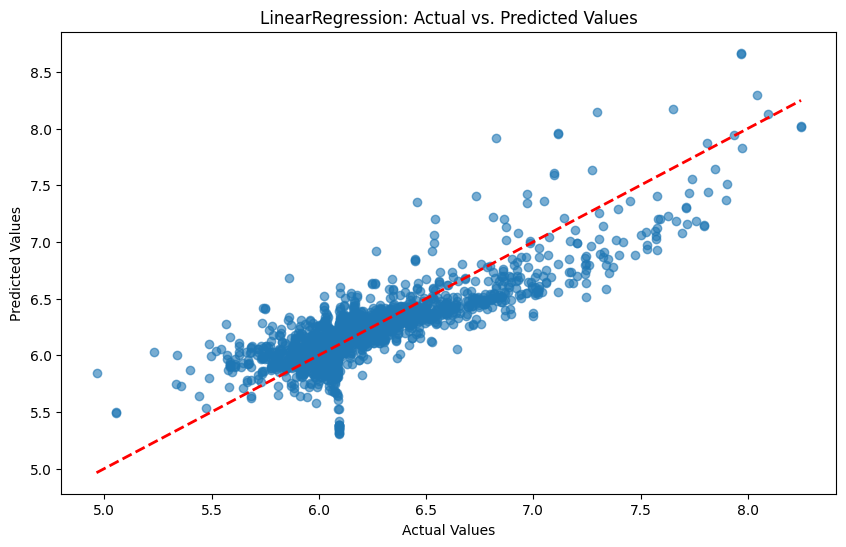

Visualizing results for Ridge...


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

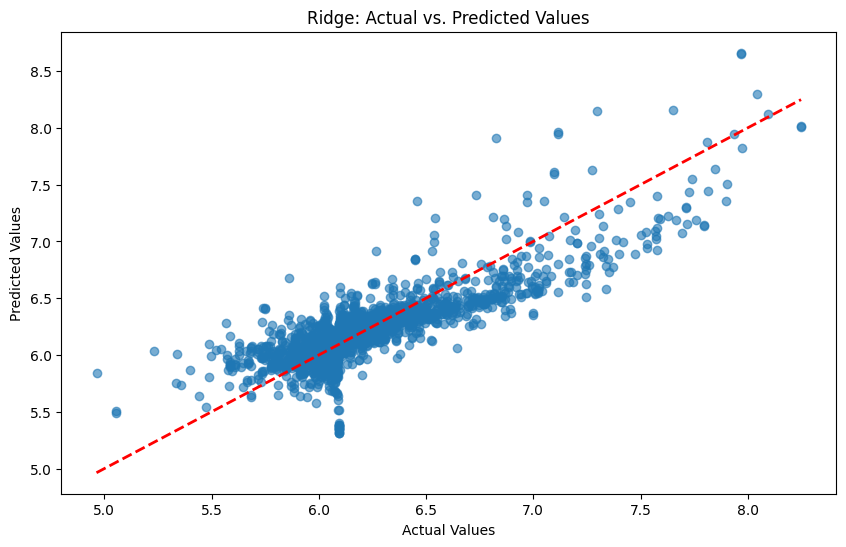

Visualizing results for Lasso...


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

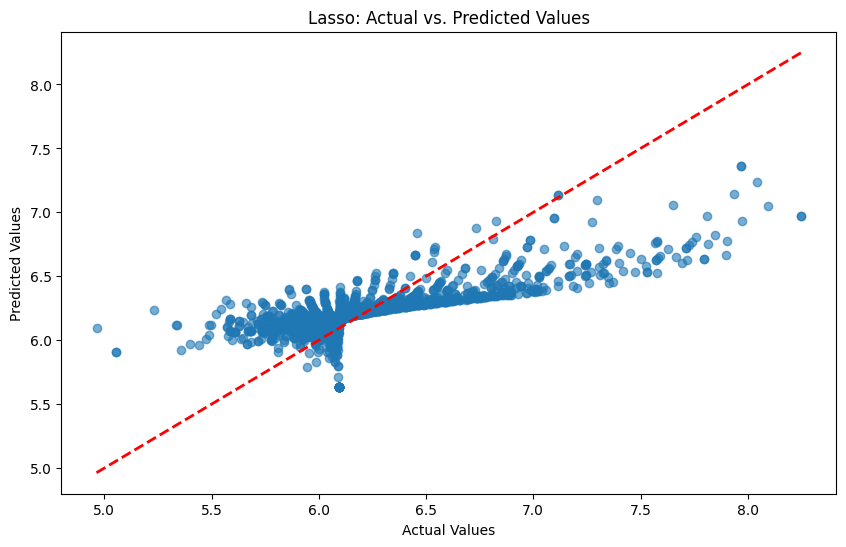

Visualizing results for GradientBoosting...


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

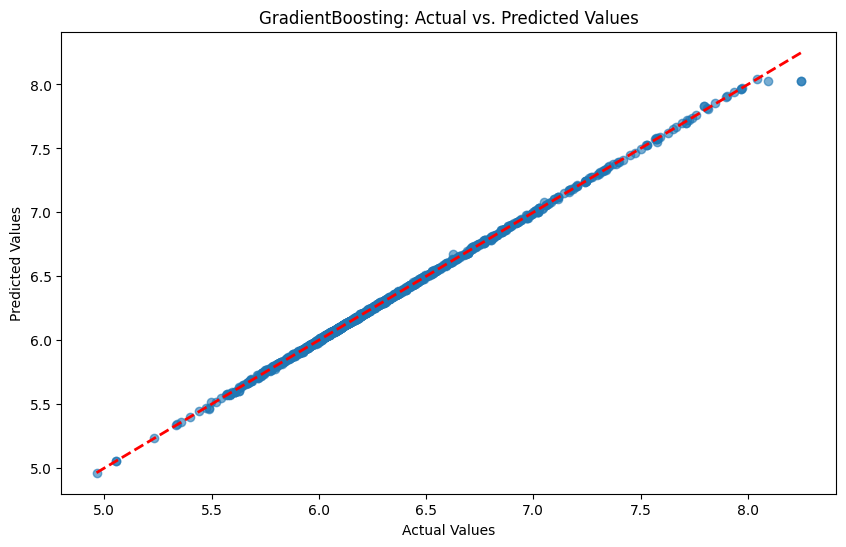

Visualizing results for DecisionTreeRegressor...


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

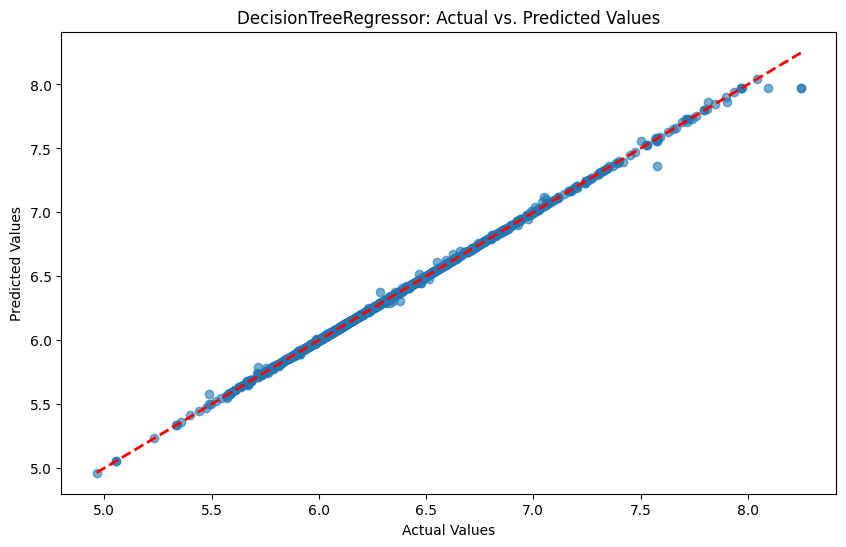

Visualizing results for RandomForestRegressor...


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

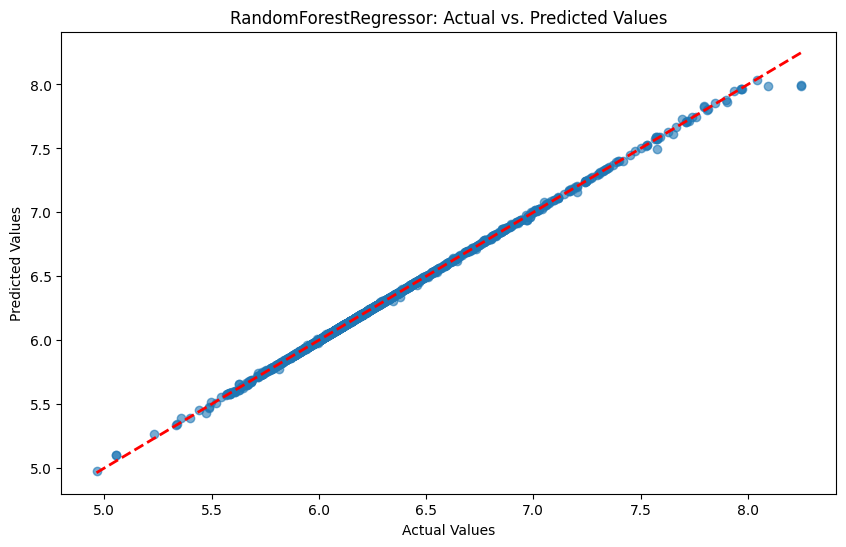

Visualizing results for KNeighborsRegressor...


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

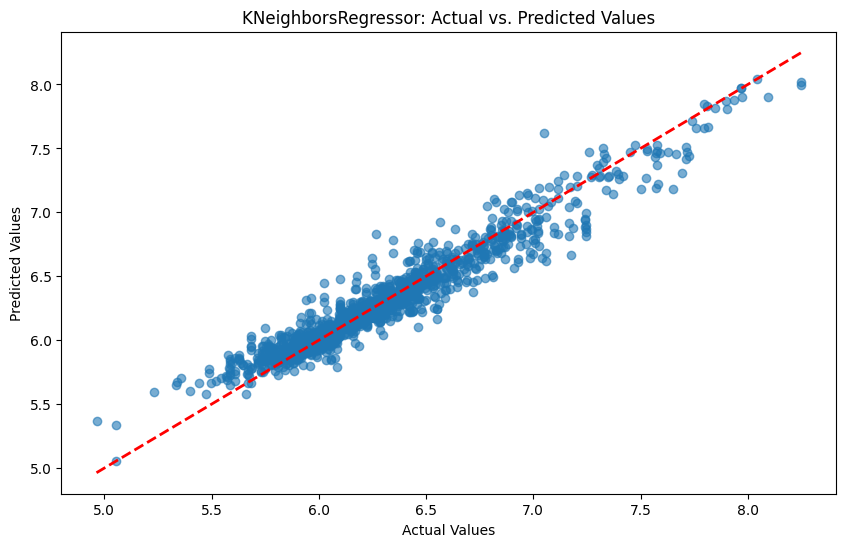

Visualizing results for SVR...


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

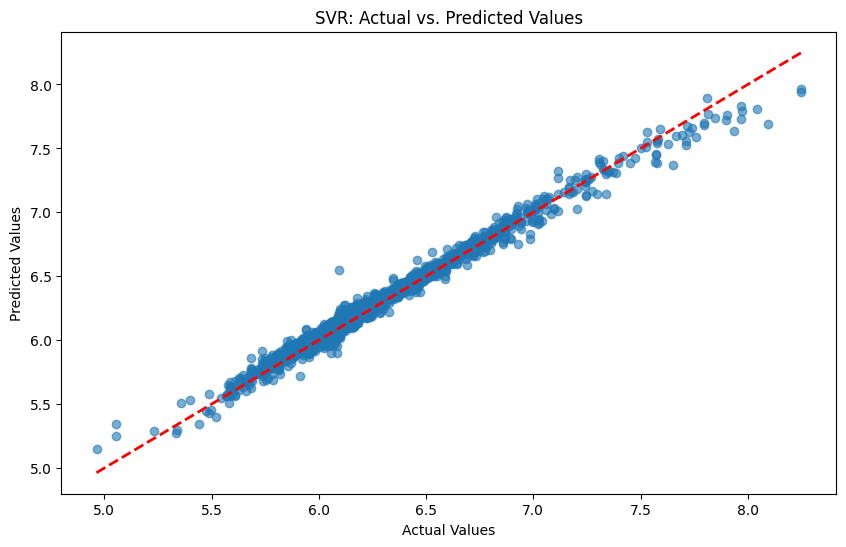

Visualizing results for PolynomialRegression...


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

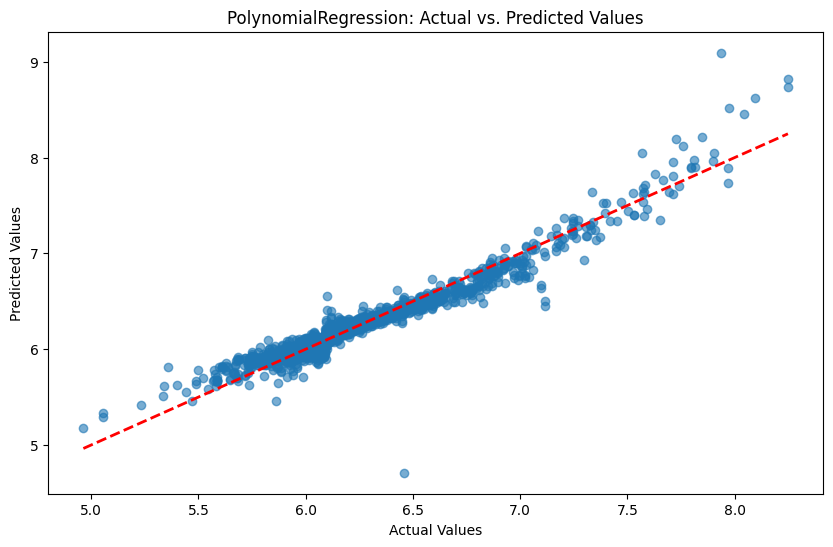

[CV 2/3] END .................................., score=-0.041 total time=   0.0s
[CV 3/3] END .................model__alpha=0.1;, score=-0.041 total time=   0.0s
[CV 3/3] END ...................model__alpha=1;, score=-0.041 total time=   0.0s
[CV 3/3] END ..................model__alpha=10;, score=-0.041 total time=   0.0s
[CV 3/3] END .................model__alpha=0.1;, score=-0.061 total time=   0.1s
[CV 1/3] END ..................model__alpha=10;, score=-0.120 total time=   0.0s
[CV 2/3] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=-0.028 total time=   1.4s
[CV 1/3] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100;, score=-0.018 total time=   2.2s
[CV 3/3] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100;, score=-0.018 total time=   2.4s
[CV 1/3] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100;, score=-0.000 total time=   1.4s
[CV 2/3] END model__learning_rate=0.1, mode

In [37]:
def plot_regression_results(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}: Actual vs. Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
    plt.show()

for model_name, model_pipeline in regression_models.items():
    print(f"Visualizing results for {model_name}...")
    grid_search = GridSearchCV(model_pipeline, regression_param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)

    plot_regression_results(y_test_reg, y_pred_reg, model_name)

## Summary

### Regression Models


**Linear Regression**

* Mean Squared Error (MSE): 0.0389
* Best Parameters: None (default settings used)

**Ridge Regression**

* Mean Squared Error (MSE): 0.0389
* Best Parameters: {'model__alpha': 10}

**Lasso Regression**

* Mean Squared Error (MSE): 0.0616
* Best Parameters: {'model__alpha': 0.1}

**Gradient Boosting Regressor**

* Mean Squared Error (MSE): 0.0001
*Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}

**Decision Tree Regressor**

* Mean Squared Error (MSE): 0.0001
* Best Parameters: {'model__max_depth': 20, 'model__min_samples_split': 5}

**Random Forest Regressor**

* Mean Squared Error (MSE): 0.0001
* Best Parameters: {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 200}

**K-Nearest Neighbors Regressor**

* Mean Squared Error (MSE): 0.0087
* Best Parameters: {'model__metric': 'euclidean', 'model__n_neighbors': 3, 'model__weights': 'distance'}

**Support Vector Regressor**

* Mean Squared Error (MSE): 0.0027
* Best Parameters: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

**Polynomial Regression**

* Mean Squared Error (MSE): 225060754.9347
* Best Parameters: {'poly__degree': 3}

### Classification Models

**Logistic Regression**

* Accuracy: 1.0000
* Best Parameters: {'model__C': 1, 'model__penalty': 'l2'}

**K-Nearest Neighbors Classifier**

* Accuracy: 0.9979
* Best Parameters: {'model__n_neighbors': 5, 'model__weights': 'uniform'}

**Decision Tree Classifier**

*Accuracy: 1.0000
*Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 5}

**Random Forest Classifier**

* Accuracy: 1.0000
* Best Parameters: {'model__max_depth': None, 'model__n_estimators': 100}

**Support Vector Machine (SVM)**

* Accuracy: 0.9992
* Best Parameters: {'model__C': 1, 'model__kernel': 'rbf'}

## Conclusion

**Regression Models:**

Best Performance: Gradient Boosting Regressor, Decision Tree Regressor, and Random Forest Regressor achieved the lowest Mean Squared Error (MSE) of 0.0001, indicating excellent performance in predicting the target variable weighted_rating.

Polynomial Regression performed poorly with a very high MSE, suggesting that a polynomial approach might not be suitable for this dataset.

Support Vector Regressor and K-Nearest Neighbors Regressor also performed well but were slightly less accurate than the ensemble methods.

**Classification Models:**

Logistic Regression, Decision Tree Classifier and Random Forest Classifier achieved perfect accuracy (1.0000), showing that they classified the data without any errors.

K-Nearest Neighbors Classifier also performed excellently with very high accuracy, though not perfect.

Support Vector Machine (SVM) achieved slightly lower accuracy compared to the top performers but still performed well.

Overall, the ensemble methods (Gradient Boosting, Random Forest) performed the best in regression tasks, while traditional classifiers (Logistic Regression and Decision Tree) excelled in classification tasks. The perfect accuracy of several models suggests that the classification task may be relatively straightforward, possibly due to well-defined classes or high quality of features.